In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from matplotlib.ticker import ScalarFormatter

import  warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore',category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import pickle



pd.options.display.float_format= '{:.4f}'.format

In [5]:
df=pd.read_csv('clean house.csv')

so lets clean the location column

In [6]:
def get_location(x):
    
    location = x.replace(",,",",").split(',')
    if len(location)<3:
        location=location[0].strip(" ")
    elif len(location)>3:
        location = location[2].strip(" ")
    else:
        location = location[1].strip(" ")

    return location 

df['Town']=df['Location'].apply(lambda x:f'{get_location(x)}')

In [7]:
df.head()

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Town
0,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions,2.0000,2.0000,3.0000,Durumi
1,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,4.0000,4.0000,5.0000,Gwarinpa
2,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions,5.0000,6.0000,6.0000,Lugbe District
3,220000000,"Behind Suncourt Hotel, Kado, Abuja",2161046,2024-03-14,2024-05-02,Available,Detached Duplex,Millions,5.0000,5.0000,6.0000,Kado
4,77500000,"Opposite Nicon Junction, Katampe, Abuja",2162917,2024-03-15,2024-05-12,Available,Terraced Duplex,Millions,5.0000,5.0000,6.0000,Katampe


In [8]:
df['Location'].value_counts()

Location
Guzape District, Abuja                           464
Maitama District, Abuja                          301
Life Camp, Abuja                                 260
Katampe Extension, Katampe, Abuja                239
Jahi, Abuja                                      212
                                                ... 
Off Aya Junction, Asokoro District, Abuja          1
Rockville Estate, Apo, Abuja                       1
Adjacent A.a Rano Filling Station, Apo, Abuja      1
Carter Grove Estate, Apo, Abuja                    1
By Turkish Hospital, Idu Industrial, Abuja         1
Name: count, Length: 1489, dtype: int64

In [9]:
df['Town'].nunique()

80

In [10]:
df.describe()

,Price,Property Ref,Bedroom,Bathroom,Toilets
count,5619.0000,5619.0000,5619.0000,5619.0000,5619.0000
mean,921011490.4807,2045888.9041,4.5602,4.9075,5.5410
std,20636710987.3041,210335.4643,1.2757,1.4069,1.3565
min,250000.0000,1324899.0000,1.0000,1.0000,1.0000
25%,120000000.0000,1975362.0000,4.0000,4.0000,5.0000
50%,220000000.0000,2119304.0000,4.0000,5.0000,5.0000
75%,400000000.0000,2199586.0000,5.0000,6.0000,6.0000
max,1400000000000.0000,2260848.0000,10.0000,10.0000,10.0000


In [11]:

df['Town']=df['Town'].str.strip(" ")

In [12]:
df['Town'].value_counts().sort_values(ascending=False)

Town
Guzape District        641
Gwarinpa               579
Katampe                472
Life Camp              440
Jahi                   402
                      ... 
By Charley Boy           1
Kagini                   1
Street                   1
Along A Tarred Road      1
fct Abuja Nigerian       1
Name: count, Length: 80, dtype: int64

In [13]:
df.Town=df["Town"].str.replace("Kiami",'Kyami')
df.Town=df["Town"].str.replace("By Gwarimpa",'Gwarimpa')
df.Town=df["Town"].str.replace("By Charley Boy",'Gwarimpa')
df.Town=df["Town"].str.replace("Gwarinpa",'Gwarimpa')
df.Town=df["Town"].str.replace("Abuja",'Jabi')
df.Town=df["Town"].str.replace("Airport Road.",'Airport Road')
df.Town=df["Town"].str.replace("Along A Tarred Road",'Kubwa')
df.Town=df["Town"].str.replace("Behind Shema Fi",'Zuba')
df.Town=df["Town"].str.replace("Beside Aviation Village",'Kyami')
df.Town=df["Town"].str.replace("Dakwo District",'Dakwo')
df.Town=df["Town"].str.replace("Diplomatic Zone",'Katampe Extension')
df.Town=df["Town"].str.replace("Katampe (Main)",'Katampe')
df.Town=df["Town"].str.replace("Goodluck Jonathan's Farm",'Kyami')
df.Town=df["Town"].str.replace("Opposite Centenary City",'Kyami')
df.Town=df["Town"].str.replace("Kyami*",'Kyami')
df.Town=df["Town"].str.replace("Life Camp Area",'Life Camp')
df.Town=df["Town"].str.replace("tipper Garage",'Dutse')
df.Town=df["Town"].str.replace("Street",'Jahi')
df.Town=df["Town"].str.replace("Second Gate",'Gudu')
df.Town=df["Town"].str.replace("fct Jabi Nigerian",'Gwarimpa')
df.Town=df["Town"].str.replace("behind Nizamiye Turkish Hospital",'Life Camp')
df.Town=df["Town"].str.replace("Airport Road",'Lugbe District')



In [14]:
df[df.Town=='Abuja']

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Town


In [15]:
def minor(x):
    location = x.split(",")
    return location[0]


In [16]:
df.loc[df.Town == "Central Business District",'Town'] = df.loc[df.Town == "Central Business District", 'Location'].apply(minor)
df.loc[df.Town=="Central Area Phase 2",'Town'] = df.loc[df.Town == 'Central Area Phase 2','Location'].apply(lambda x: minor(x))


In [17]:
df[df.Town=="Cultural Zones"]

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Town
3309,16000000,"Gbessa- Sauka, Yetu Quarters, Cultural Zones, ...",2123031,2024-02-17,2024-05-14,Available,Detached Bungalow,Millions,4.0000,3.0000,4.0000,Cultural Zones


In [18]:
df.Town.value_counts()

Town
Guzape District    641
Gwarimpa           582
Katampe            473
Life Camp          443
Jahi               403
                  ... 
Dei-Dei              1
Mpape                1
Life Camp Area       1
Mararaba             1
Kagini               1
Name: count, Length: 64, dtype: int64

In [19]:
df[df.Town=="Dape"]

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Town
1724,65000000,"Liefcamp After Magistrate Court, Dape, Abuja",2120769,2024-02-15,2024-05-02,Available,House,Millions,3.0000,3.0000,4.0000,Dape
2089,125000000,"Dape, Abuja",1666134,2023-03-19,2024-05-02,Available,Terraced Duplex,Millions,4.0000,4.0000,5.0000,Dape


In [20]:
sorted(df['Town'].unique())

['Apo',
 'Apo Resettlement',
 'Asokoro District',
 'Bwari',
 'Central Area Phase 2',
 'Cultural Zones',
 'Dakibiyu',
 'Dakwo',
 'Dape',
 'Dawaki',
 'Dei-Dei',
 'Duboyi',
 'Durumi',
 'Dutse',
 'Efab Metropolis',
 'Efab Queen Estate',
 'Gaduwa',
 'Galadimawa',
 'Games Village',
 'Garki',
 'Gudu',
 'Guzape District',
 'Gwagwalada',
 'Gwarimpa',
 'Hammers Estate',
 'Idu Industrial',
 'Jabi',
 'Jahi',
 'Jikwoyi',
 'Kabusa',
 'Kado',
 'Kafe',
 'Kagini',
 'Karmo',
 'Karsana',
 'Karshi',
 'Karu',
 'Katampe',
 'Katampe Extension',
 'Kaura',
 'Kubwa',
 'Kuje',
 'Kukwaba',
 'Kurudu',
 'Kyami',
 'Life Camp',
 'Life Camp Area',
 'Lokogoma District',
 'Lugbe District',
 'Mabushi',
 'Maitama District',
 'Mararaba',
 'Mbora (Nbora)',
 'Mpape',
 'Nyanya',
 'Opposite Centenary City',
 'Orozo',
 'Sabon Lugbe',
 'Utako',
 'Wumba',
 'Wuse',
 'Wuse 2',
 'Wuye',
 'Zuba']

In [21]:
df.columns

Index(['Price', 'Location', 'Property Ref', 'Date Added', 'Last Updated',
       'market Status', 'Type', 'Price_cat', 'Bedroom', 'Bathroom', 'Toilets',
       'Town'],
      dtype='object')

In [22]:
df['Type'] = df['Type'].str.strip()

In [23]:
df.to_csv('House.csv',index=False)

In [24]:
df.head()

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Town
0,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions,2.0000,2.0000,3.0000,Durumi
1,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,4.0000,4.0000,5.0000,Gwarimpa
2,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions,5.0000,6.0000,6.0000,Lugbe District
3,220000000,"Behind Suncourt Hotel, Kado, Abuja",2161046,2024-03-14,2024-05-02,Available,Detached Duplex,Millions,5.0000,5.0000,6.0000,Kado
4,77500000,"Opposite Nicon Junction, Katampe, Abuja",2162917,2024-03-15,2024-05-12,Available,Terraced Duplex,Millions,5.0000,5.0000,6.0000,Katampe


In [25]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_cleaned = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
df_cleaned.head()

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Town
0,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions,2.0000,2.0000,3.0000,Durumi
1,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,4.0000,4.0000,5.0000,Gwarimpa
2,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions,5.0000,6.0000,6.0000,Lugbe District
3,220000000,"Behind Suncourt Hotel, Kado, Abuja",2161046,2024-03-14,2024-05-02,Available,Detached Duplex,Millions,5.0000,5.0000,6.0000,Kado
4,77500000,"Opposite Nicon Junction, Katampe, Abuja",2162917,2024-03-15,2024-05-12,Available,Terraced Duplex,Millions,5.0000,5.0000,6.0000,Katampe


In [26]:
outliers = df[df['Price'] >= upper_bound]

In [27]:
outliers.describe()

,Price,Property Ref,Bedroom,Bathroom,Toilets
count,624.0000,624.0000,624.0000,624.0000,624.0000
mean,6363189102.5641,2050035.1362,6.1506,6.5753,7.1538
std,61698959914.2506,187996.1387,1.5650,1.7290,1.6776
min,850000000.0000,1345342.0000,1.0000,1.0000,1.0000
25%,1000000000.0000,1999855.0000,5.0000,5.0000,6.0000
50%,1500000000.0000,2103672.0000,6.0000,6.5000,7.0000
75%,3000000000.0000,2176135.0000,7.0000,8.0000,8.0000
max,1400000000000.0000,2260277.0000,9.0000,10.0000,10.0000


In [28]:
df_cleaned.describe()

,Price,Property Ref,Bedroom,Bathroom,Toilets
count,4995.0000,4995.0000,4995.0000,4995.0000,4995.0000
mean,241147860.8631,2045370.9363,4.3616,4.6991,5.3395
std,177176569.3345,212973.0737,1.0815,1.2094,1.1633
min,250000.0000,1324899.0000,1.0000,1.0000,1.0000
25%,110000000.0000,1969034.5000,4.0000,4.0000,5.0000
50%,190000000.0000,2121983.0000,4.0000,5.0000,5.0000
75%,350000000.0000,2201885.0000,5.0000,5.0000,6.0000
max,800000000.0000,2260848.0000,10.0000,10.0000,10.0000


In [29]:
df_cleaned['Price'].mean()

241147860.86306307

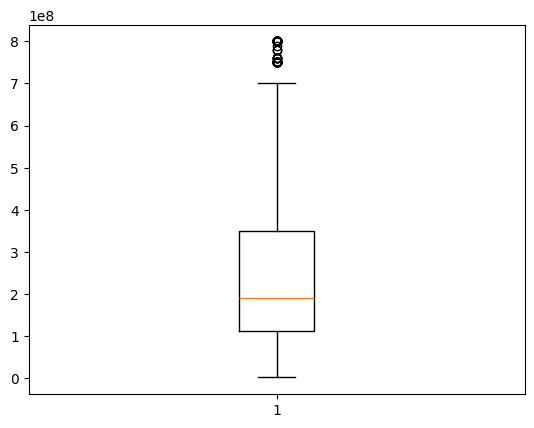

In [30]:
plt.boxplot(df_cleaned['Price'])
plt.show()

<Axes: >

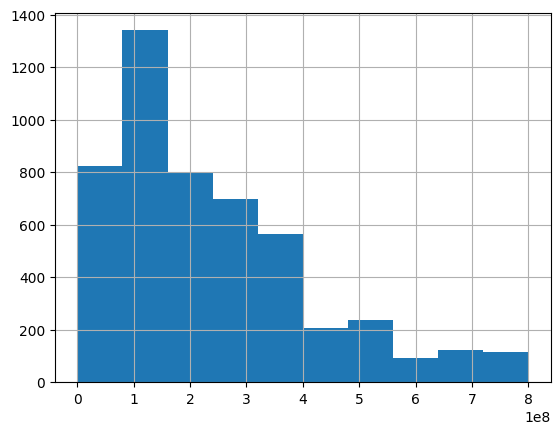

In [31]:
df_cleaned["Price"].hist()

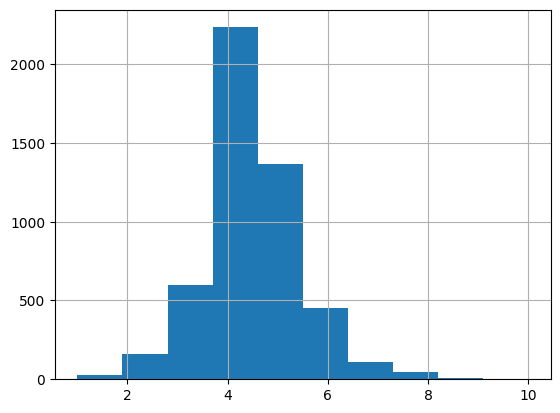

In [32]:
df_cleaned['Bedroom'].hist()
plt.show()

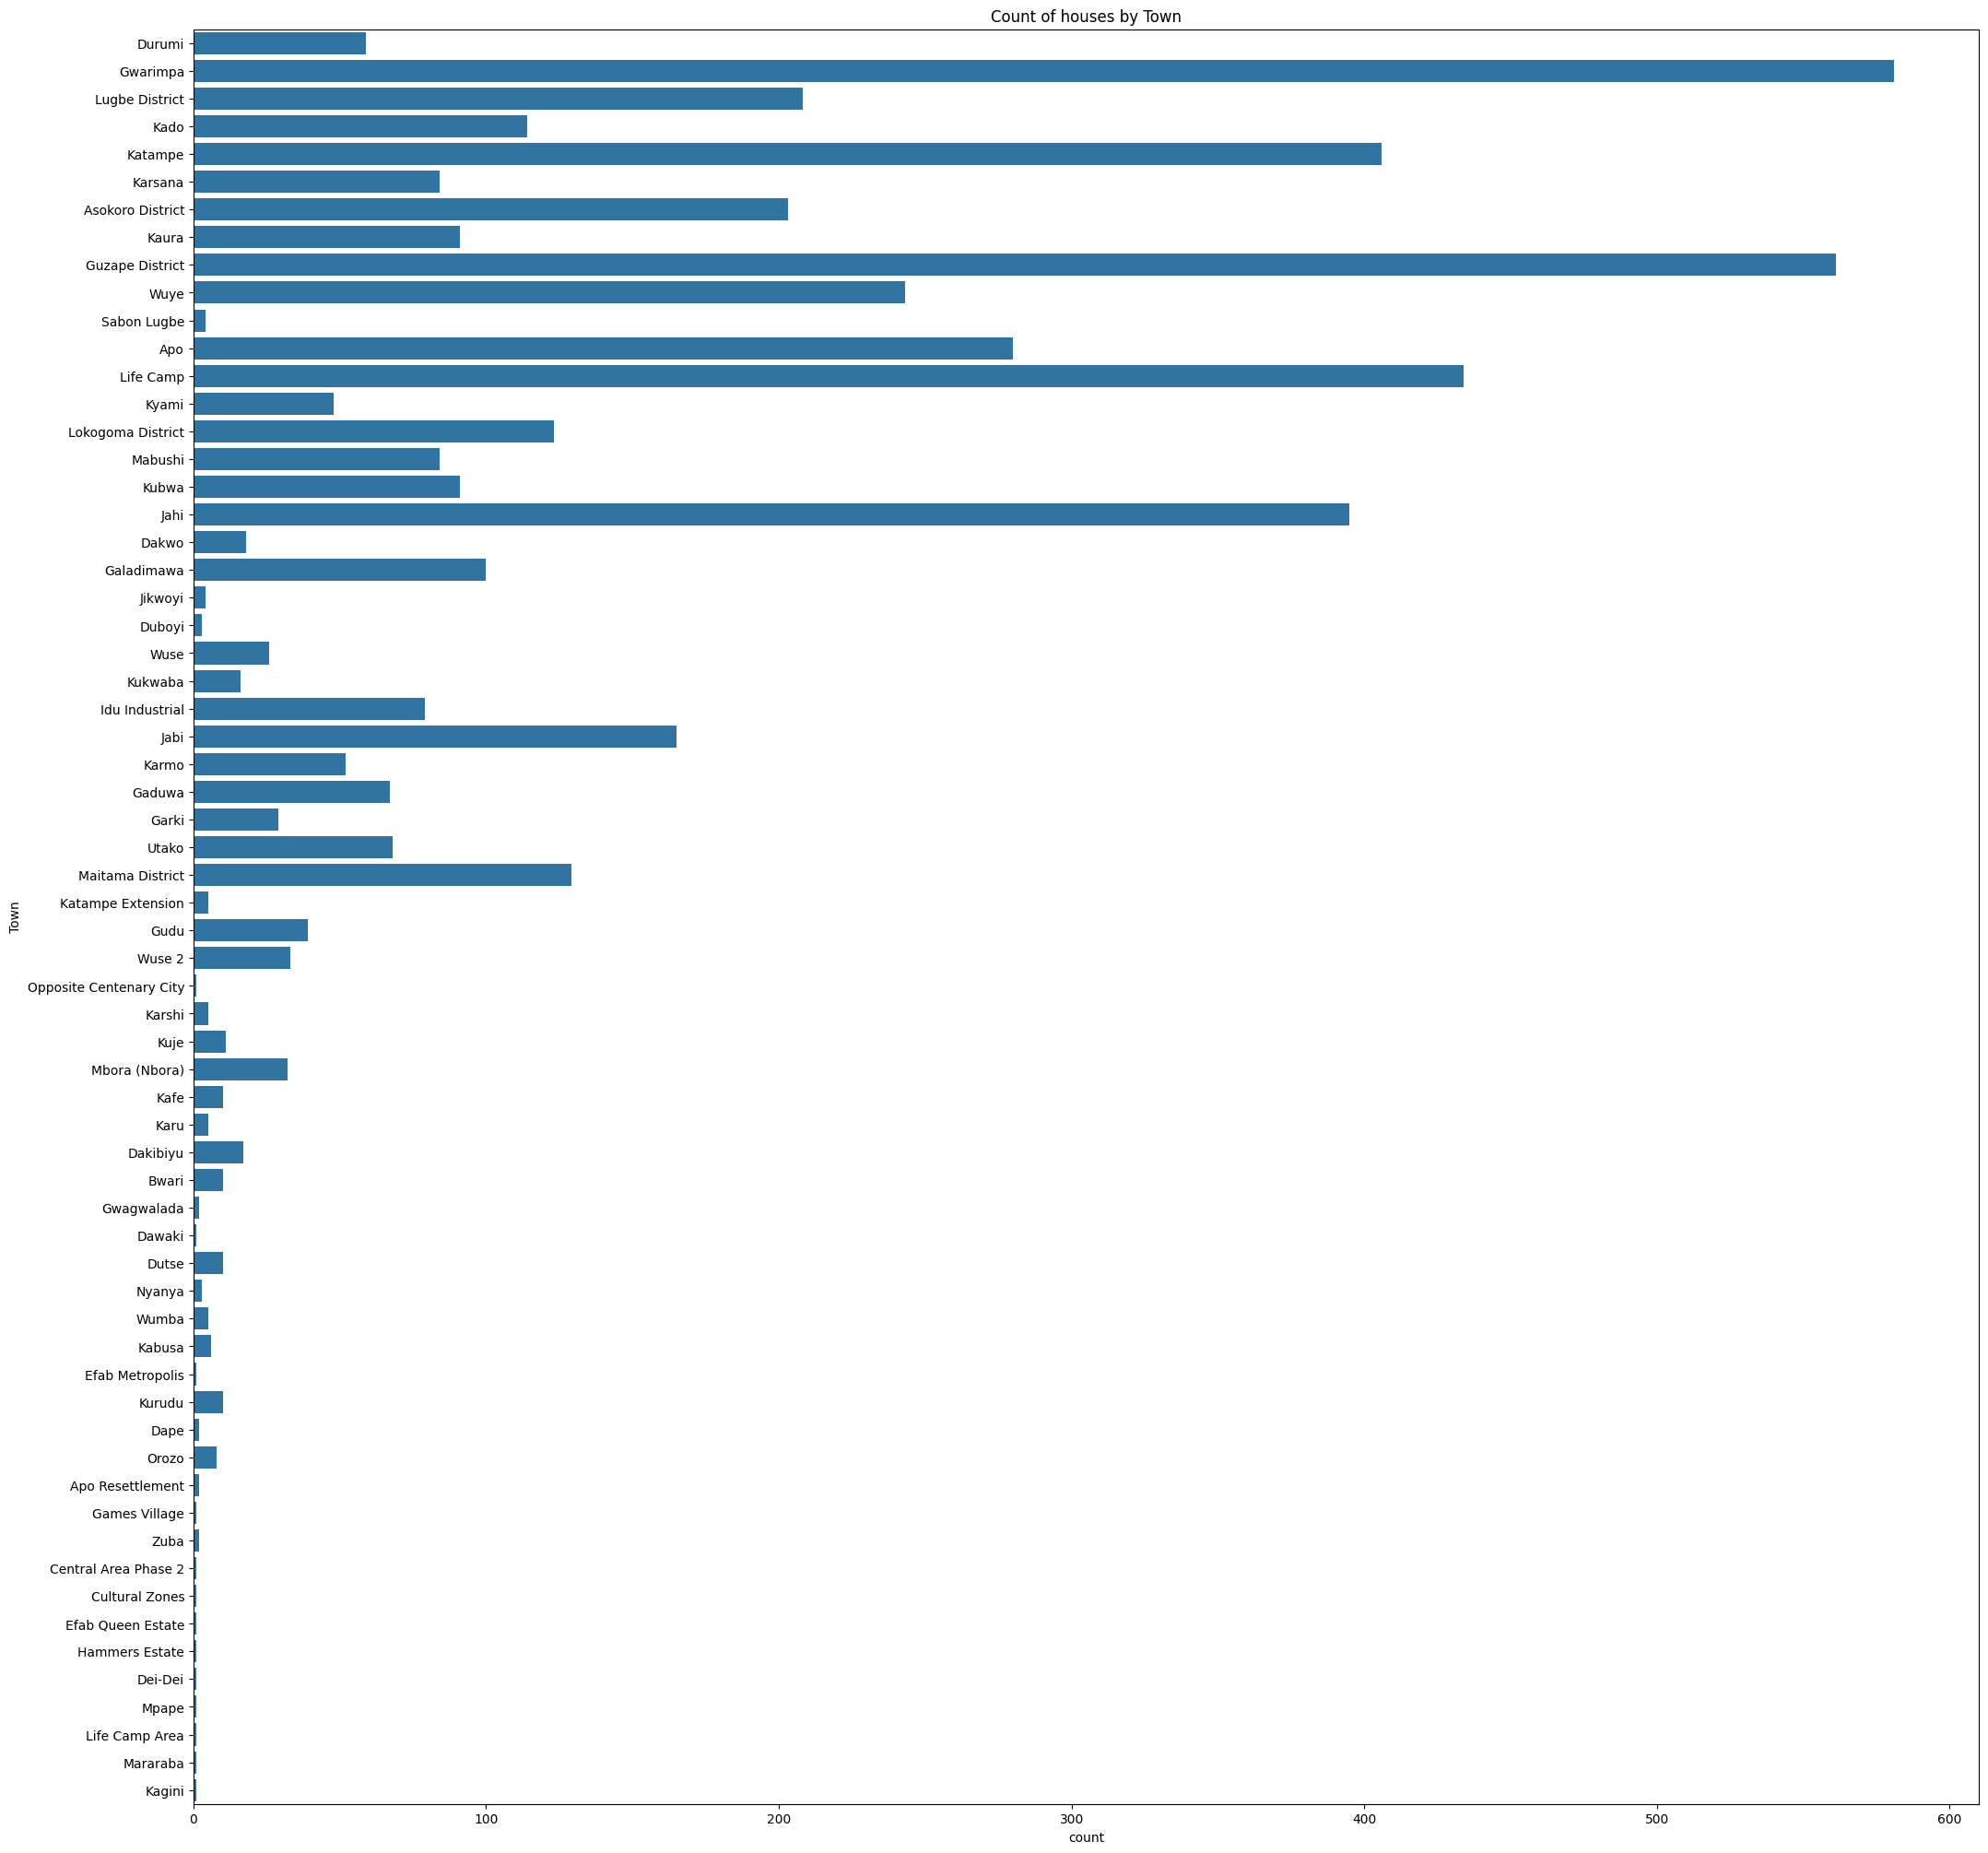

In [33]:
plt.figure(figsize=(25,25))
sns.countplot(df_cleaned['Town'])
plt.title('Count of houses by Town')
plt.show()

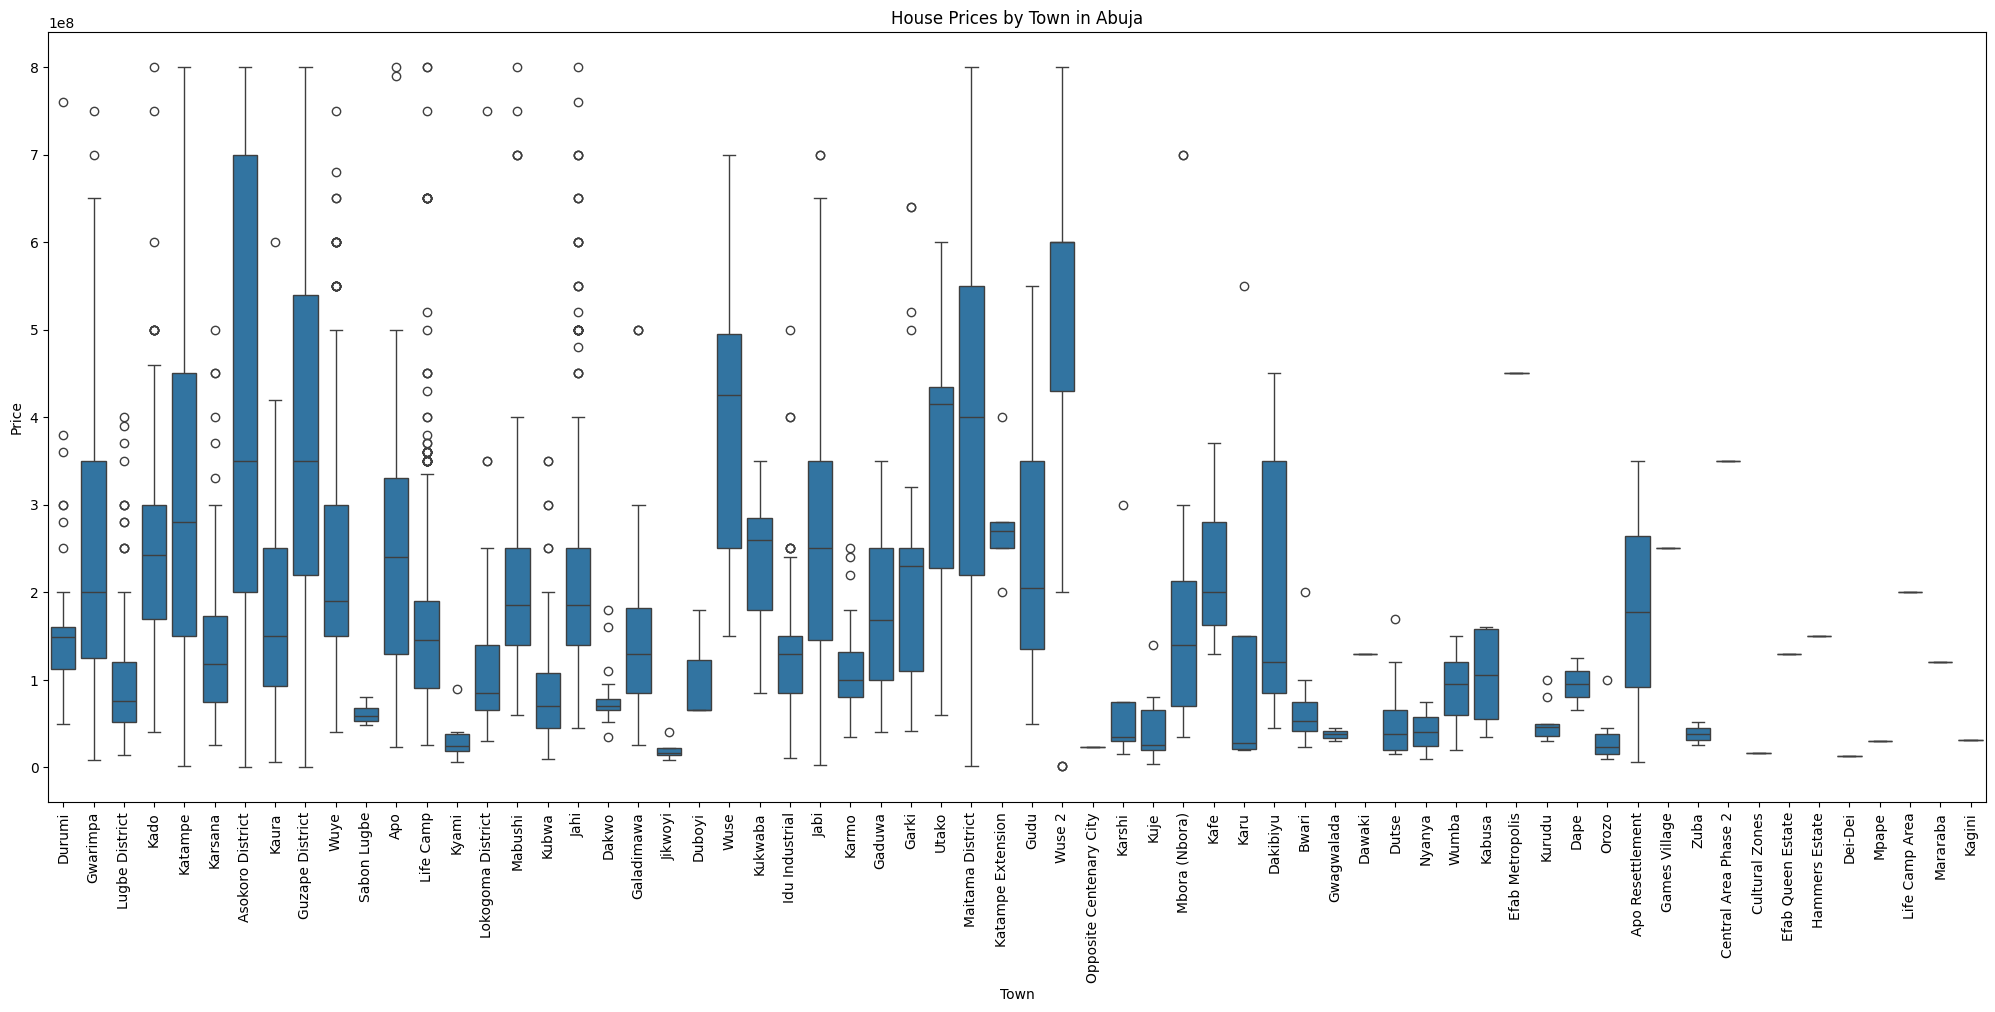

In [34]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Town', y='Price', data=df_cleaned)
plt.xticks(rotation=90)
plt.title("House Prices by Town in Abuja")
plt.show()

In [35]:
df_cleaned.groupby("Type")["Price"].mean().sort_values(ascending=False)

Type
Detached Duplex          333174610.4496
Semi-detached Duplex     258467669.1699
House                    196324350.0000
Terraced Duplex          182257841.7782
Block of Flats           144340830.4498
Terraced Bungalow         86860000.0000
Detached Bungalow         78465044.2982
Semi-detached Bungalow    57829787.2340
Name: Price, dtype: float64

<Axes: xlabel='Town'>

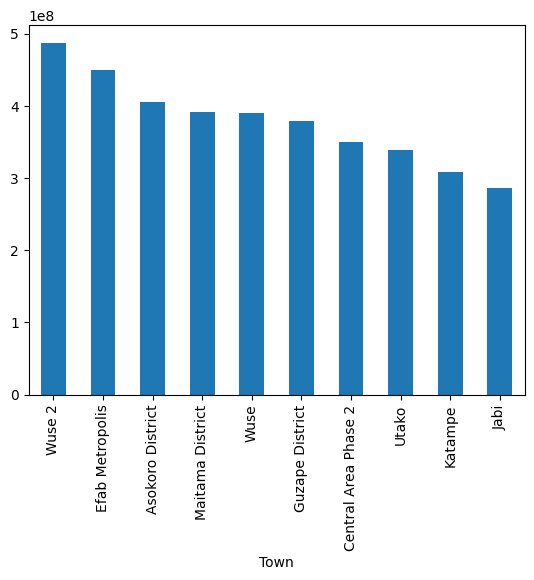

In [36]:
df_cleaned.groupby("Town")["Price"].mean().sort_values(ascending=False)[:10].plot(kind='bar')

In [37]:
df_cleaned.groupby("Type")["Price"].mean().sort_values(ascending=False).index

Index(['Detached Duplex', 'Semi-detached Duplex', 'House', 'Terraced Duplex',
       'Block of Flats', 'Terraced Bungalow', 'Detached Bungalow',
       'Semi-detached Bungalow'],
      dtype='object', name='Type')

In [38]:
df_cleaned.groupby("Town")["Price"].mean().sort_values(ascending=False)[54:]

Town
Zuba                      38500000.0000
Gwagwalada                37500000.0000
Orozo                     32875000.0000
Kagini                    31000000.0000
Mpape                     30000000.0000
Kyami                     26871688.2500
Opposite Centenary City   23500000.0000
Jikwoyi                   20000000.0000
Cultural Zones            16000000.0000
Dei-Dei                   13000000.0000
Name: Price, dtype: float64

In [39]:
detached_duplex = df_cleaned.loc[df_cleaned.Type == "Detached Duplex"]
semidetached_duplex = df_cleaned.loc[df_cleaned.Type == "Semi-detached Duplex"]
House = df_cleaned.loc[df_cleaned.Type == "House"]
terraced_duplex = df_cleaned.loc[df_cleaned.Type == "Terraced Duplex"]
block_of_flats = df_cleaned.loc[df_cleaned.Type == "Block of Flats"]
terraced_bungalow = df_cleaned.loc[df_cleaned.Type == "Terraced Bungalow"]
detached_bungalow = df_cleaned.loc[df_cleaned.Type == "Detached Bungalow"]
semidetached_bungalow = df_cleaned.loc[df_cleaned.Type == "Semi-detached Bungalow"]


In [40]:
detached_duplex['Town'].value_counts()

Town
Gwarimpa                287
Guzape District         281
Katampe                 172
Apo                     164
Asokoro District        127
Life Camp               104
Lugbe District           95
Wuye                     72
Jahi                     52
Lokogoma District        51
Galadimawa               47
Kado                     46
Maitama District         46
Jabi                     44
Kaura                    40
Gaduwa                   34
Karsana                  34
Kubwa                    22
Idu Industrial           20
Mabushi                  19
Kukwaba                  12
Durumi                   11
Wuse                     11
Karmo                     8
Kafe                      8
Mbora (Nbora)             6
Garki                     5
Dakwo                     5
Bwari                     5
Utako                     5
Sabon Lugbe               4
Wuse 2                    4
Gudu                      3
Karshi                    3
Dakibiyu                  2
Kurudu         

In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 5618
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          4995 non-null   int64  
 1   Location       4995 non-null   object 
 2   Property Ref   4995 non-null   int64  
 3   Date Added     4995 non-null   object 
 4   Last Updated   4995 non-null   object 
 5   market Status  4995 non-null   object 
 6   Type           4995 non-null   object 
 7   Price_cat      4995 non-null   object 
 8   Bedroom        4995 non-null   float64
 9   Bathroom       4995 non-null   float64
 10  Toilets        4995 non-null   float64
 11  Town           4995 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 507.3+ KB


In [42]:
df_cleaned['Date Added'] = pd.to_datetime(df_cleaned['Date Added'])
df_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 5618
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Price          4995 non-null   int64         
 1   Location       4995 non-null   object        
 2   Property Ref   4995 non-null   int64         
 3   Date Added     4995 non-null   datetime64[ns]
 4   Last Updated   4995 non-null   object        
 5   market Status  4995 non-null   object        
 6   Type           4995 non-null   object        
 7   Price_cat      4995 non-null   object        
 8   Bedroom        4995 non-null   float64       
 9   Bathroom       4995 non-null   float64       
 10  Toilets        4995 non-null   float64       
 11  Town           4995 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 507.3+ KB


In [43]:
df

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Town
0,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions,2.0000,2.0000,3.0000,Durumi
1,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,4.0000,4.0000,5.0000,Gwarimpa
2,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions,5.0000,6.0000,6.0000,Lugbe District
3,220000000,"Behind Suncourt Hotel, Kado, Abuja",2161046,2024-03-14,2024-05-02,Available,Detached Duplex,Millions,5.0000,5.0000,6.0000,Kado
4,77500000,"Opposite Nicon Junction, Katampe, Abuja",2162917,2024-03-15,2024-05-12,Available,Terraced Duplex,Millions,5.0000,5.0000,6.0000,Katampe
...,...,...,...,...,...,...,...,...,...,...,...,...
5614,210000000,"Karsana District, Gwarinpa, Abuja",1412529,2022-08-06,2024-05-16,Available,Detached Duplex,Millions,4.0000,5.0000,6.0000,Gwarimpa
5615,300000000,"Guzape District, Abuja",1416671,2022-08-10,2024-04-04,Available,Semi-detached Duplex,Millions,6.0000,6.0000,7.0000,Guzape District
5616,95000000,"Dakibiyu, Abuja",1358938,2022-06-18,2024-02-22,Available,Semi-detached Duplex,Millions,4.0000,4.0000,5.0000,Dakibiyu
5617,420000000,"Katampe Extension, Katampe, Abuja",1413836,2022-08-08,2024-05-17,Available,Detached Duplex,Millions,6.0000,6.0000,7.0000,Katampe


In [44]:
df_cleaned['Date Added'].dt.year

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
5614    2022
5615    2022
5616    2022
5617    2022
5618    2022
Name: Date Added, Length: 4995, dtype: int32

In [45]:
#df_cleaned.groupby(df_cleaned['Date Added'])['Price'].index

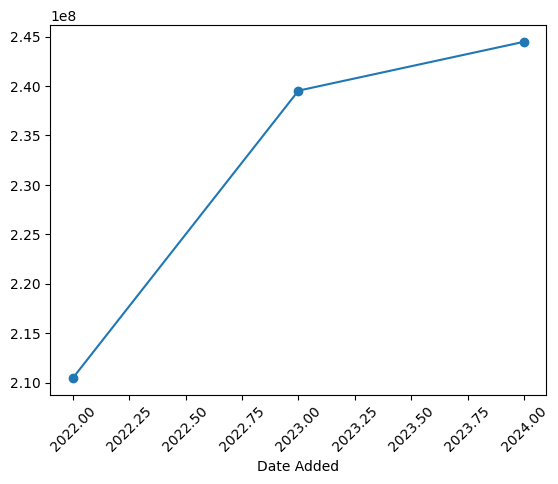

In [46]:

df_cleaned.groupby(df_cleaned['Date Added'].dt.year)['Price'].mean().plot(kind='line', marker='o')
plt.xticks(rotation = 45)
plt.show()

In [47]:
df_cleaned['Location_encoded'] = df_cleaned['Town'].astype('category').cat.codes

# Compute Pearson correlation
print(df_cleaned[['Location_encoded', 'Price']].corr())

                  Location_encoded   Price
Location_encoded            1.0000 -0.1236
Price                      -0.1236  1.0000


In [48]:
df_cleaned['Type_encoded'] = df_cleaned['Type'].astype('category').cat.codes
print(df_cleaned[['Type_encoded', 'Price']].corr())


              Type_encoded   Price
Type_encoded        1.0000 -0.1839
Price              -0.1839  1.0000


In [49]:
# Compute Pearson correlation


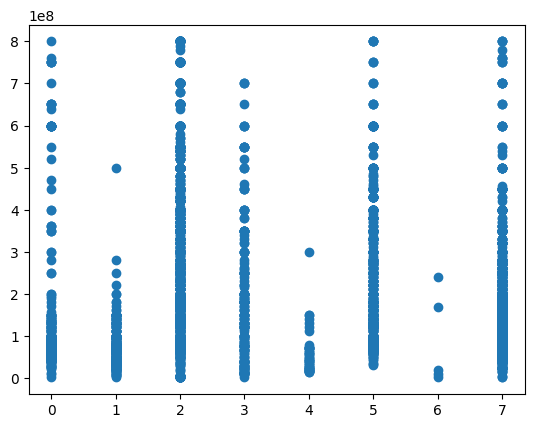

In [50]:
plt.scatter(df_cleaned['Type_encoded'], df_cleaned['Price'])
plt.show()

In [51]:
df_cleaned

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Town,Location_encoded,Type_encoded
0,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions,2.0000,2.0000,3.0000,Durumi,12,0
1,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,4.0000,4.0000,5.0000,Gwarimpa,23,2
2,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions,5.0000,6.0000,6.0000,Lugbe District,48,3
3,220000000,"Behind Suncourt Hotel, Kado, Abuja",2161046,2024-03-14,2024-05-02,Available,Detached Duplex,Millions,5.0000,5.0000,6.0000,Kado,30,2
4,77500000,"Opposite Nicon Junction, Katampe, Abuja",2162917,2024-03-15,2024-05-12,Available,Terraced Duplex,Millions,5.0000,5.0000,6.0000,Katampe,37,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,210000000,"Karsana District, Gwarinpa, Abuja",1412529,2022-08-06,2024-05-16,Available,Detached Duplex,Millions,4.0000,5.0000,6.0000,Gwarimpa,23,2
5615,300000000,"Guzape District, Abuja",1416671,2022-08-10,2024-04-04,Available,Semi-detached Duplex,Millions,6.0000,6.0000,7.0000,Guzape District,21,5
5616,95000000,"Dakibiyu, Abuja",1358938,2022-06-18,2024-02-22,Available,Semi-detached Duplex,Millions,4.0000,4.0000,5.0000,Dakibiyu,6,5
5617,420000000,"Katampe Extension, Katampe, Abuja",1413836,2022-08-08,2024-05-17,Available,Detached Duplex,Millions,6.0000,6.0000,7.0000,Katampe,37,2


In [52]:
df_cleaned.columns

Index(['Price', 'Location', 'Property Ref', 'Date Added', 'Last Updated',
       'market Status', 'Type', 'Price_cat', 'Bedroom', 'Bathroom', 'Toilets',
       'Town', 'Location_encoded', 'Type_encoded'],
      dtype='object')

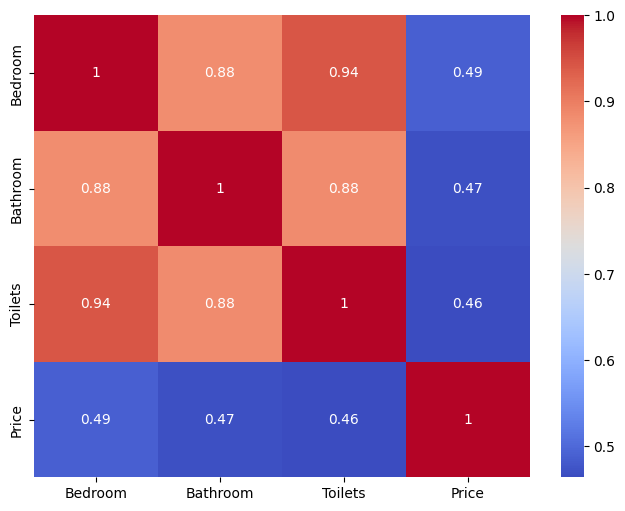

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned[['Bedroom','Bathroom','Toilets','Price']].corr(), annot=True, cmap="coolwarm")
plt.show()

In [54]:
type_encoder = LabelEncoder()
town_encoder = LabelEncoder()
df_cleaned['Type_encoded'] = type_encoder.fit_transform(df_cleaned['Type'])
df_cleaned['Location_encoded'] = town_encoder.fit_transform(df_cleaned['Town'])

with open('Type_encoder.pkl','wb') as file:
    pickle.dump(type_encoder,file)

with open('Town_encoder.pkl','wb') as file:
    pickle.dump(town_encoder,file)

In [55]:
df_cleaned

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Town,Location_encoded,Type_encoded
0,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions,2.0000,2.0000,3.0000,Durumi,12,0
1,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,4.0000,4.0000,5.0000,Gwarimpa,23,2
2,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions,5.0000,6.0000,6.0000,Lugbe District,48,3
3,220000000,"Behind Suncourt Hotel, Kado, Abuja",2161046,2024-03-14,2024-05-02,Available,Detached Duplex,Millions,5.0000,5.0000,6.0000,Kado,30,2
4,77500000,"Opposite Nicon Junction, Katampe, Abuja",2162917,2024-03-15,2024-05-12,Available,Terraced Duplex,Millions,5.0000,5.0000,6.0000,Katampe,37,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,210000000,"Karsana District, Gwarinpa, Abuja",1412529,2022-08-06,2024-05-16,Available,Detached Duplex,Millions,4.0000,5.0000,6.0000,Gwarimpa,23,2
5615,300000000,"Guzape District, Abuja",1416671,2022-08-10,2024-04-04,Available,Semi-detached Duplex,Millions,6.0000,6.0000,7.0000,Guzape District,21,5
5616,95000000,"Dakibiyu, Abuja",1358938,2022-06-18,2024-02-22,Available,Semi-detached Duplex,Millions,4.0000,4.0000,5.0000,Dakibiyu,6,5
5617,420000000,"Katampe Extension, Katampe, Abuja",1413836,2022-08-08,2024-05-17,Available,Detached Duplex,Millions,6.0000,6.0000,7.0000,Katampe,37,2


In [56]:
X = df_cleaned[['Bedroom','Type_encoded','Location_encoded']]
y = df_cleaned['Price']



In [57]:
x_test,x_train,y_test,y_train = train_test_split(X,y,test_size= 0.2, random_state=42)

In [58]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [59]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)





In [60]:
r2_score = r2_score(y_pred,y_test)

mse = mean_squared_error(y_pred, y_test)

In [61]:
r2_score

0.18858235738401774

In [62]:
mse

1.9646052572760412e+16